In [3]:
import numpy as np
from numpy.fft import fftshift, fft2, ifft2, ifftshift
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from scipy import misc
from scipy import ndimage

import cv2
import glob
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

from utils import gauss2D_norm, filterDFT, my_imfilter

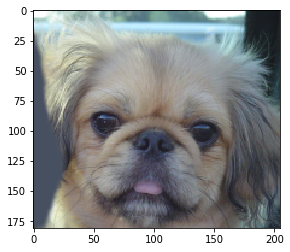

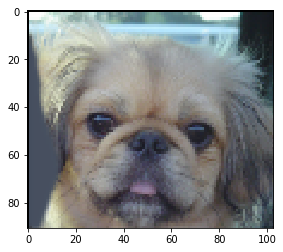

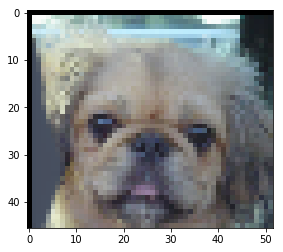

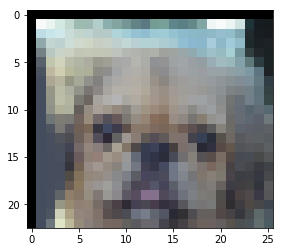

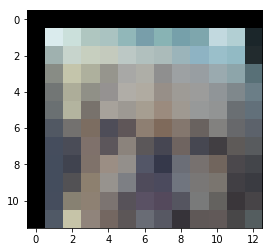

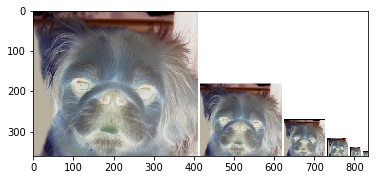

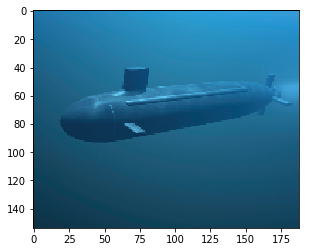

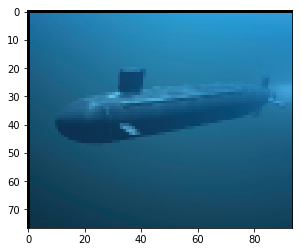

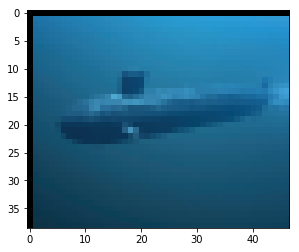

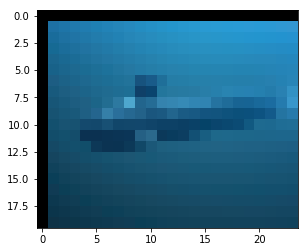

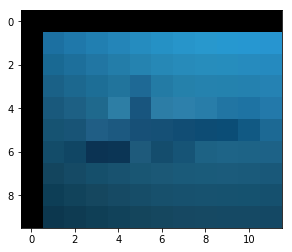

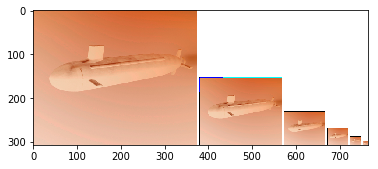

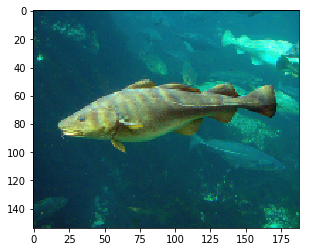

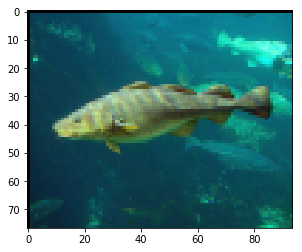

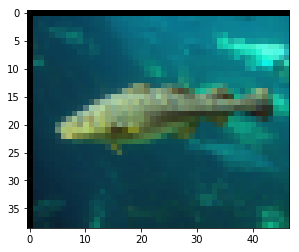

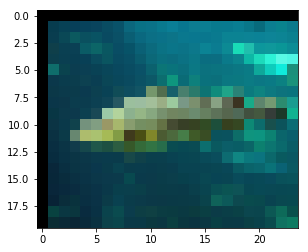

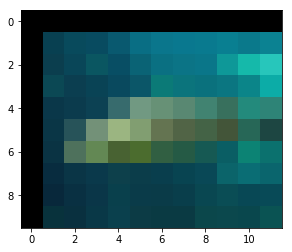

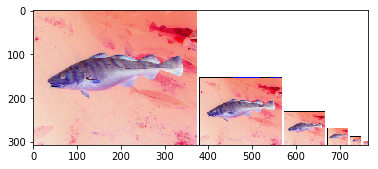

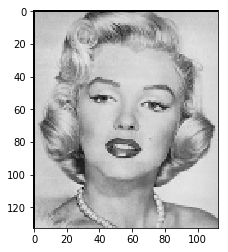

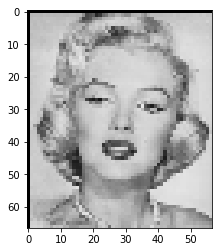

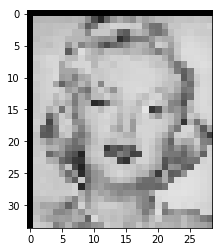

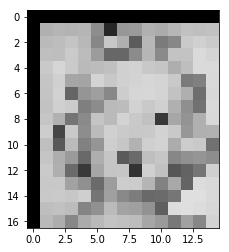

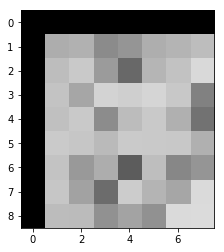

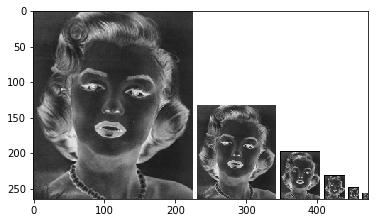

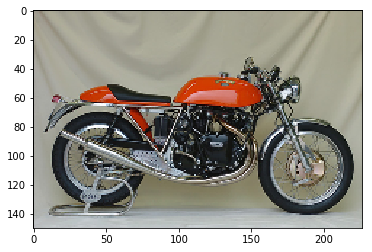

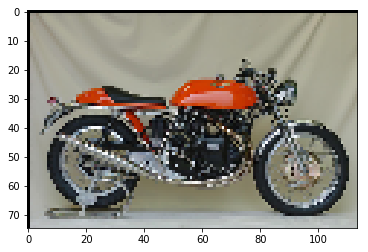

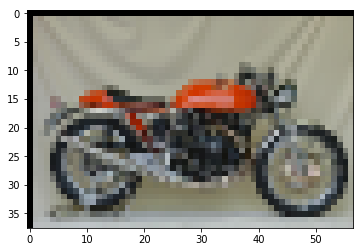

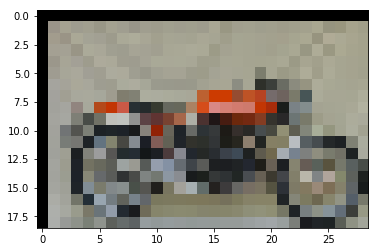

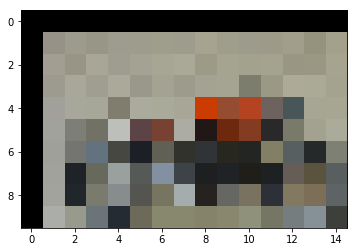

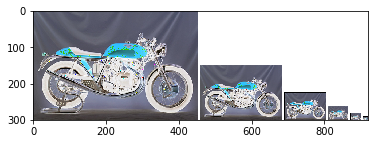

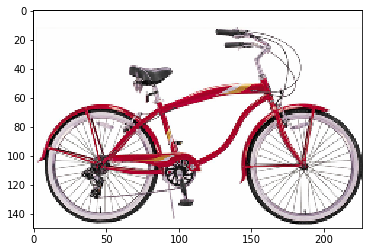

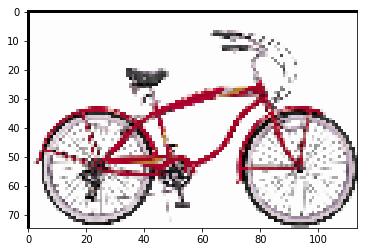

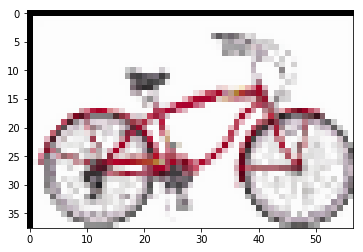

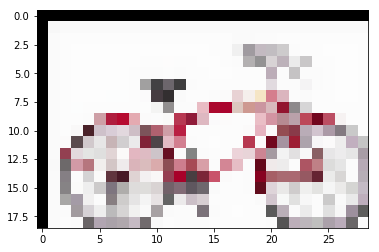

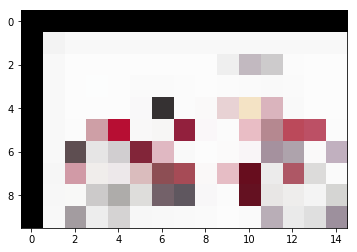

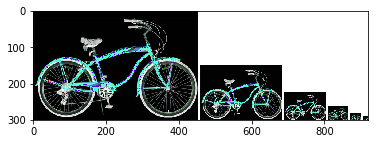

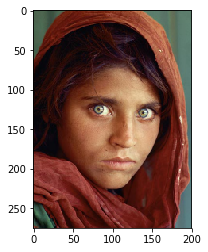

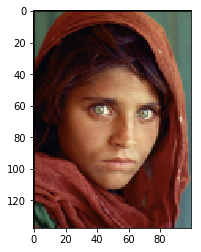

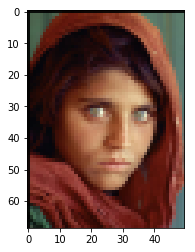

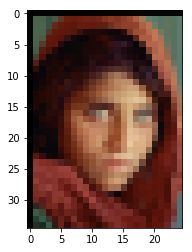

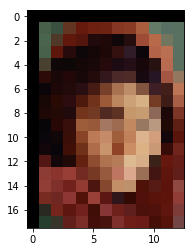

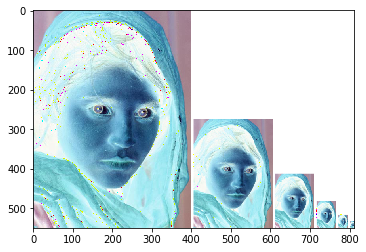

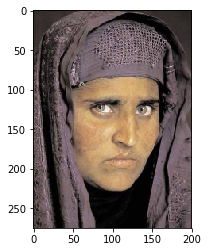

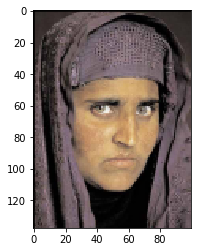

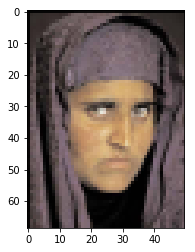

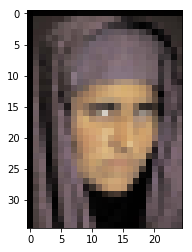

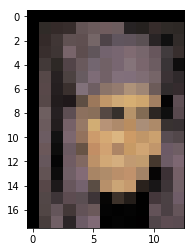

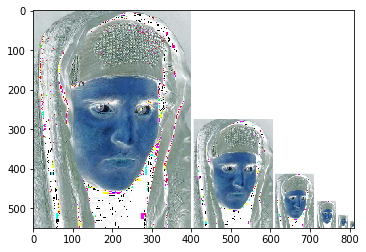

KeyboardInterrupt: 

In [4]:
images = glob.glob('./data/*')

for idx, fname in enumerate(images):
    img = ndimage.imread(fname)
    original_height = img.shape[0]
    output = img.copy()
    output_fft = fftshift(fft2(img))
    for i in range(5):
        # Make a gaussian filter
        gaussian_filter = gauss2D_norm(shape=(img.shape[1],img.shape[1]), sigma=2/(2*3.14))

        # Convolute gaussian filter
        img = my_imfilter(img, gaussian_filter)[::2,::2, :]
        plt.imshow(img)
        plt.show()

        # Concate each image
        output = np.concatenate((output, np.ones((original_height, 5, 3))), axis=1)
        tmp = np.concatenate((np.ones((original_height-img.shape[0], img.shape[1], 3)), img), axis=0)
        output = np.concatenate((output, tmp), axis=1)

    # Show and save results
    plt.imshow(output)
    misc.imsave("./image_pyramid/pyramid_{}.png".format(fname.split('/')[2].split('.')[0]), output)
    plt.show()
